Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [1]:
# Import necessary libraries
import pandas as pd  # for data handling
import numpy as np  # for mathematical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for advanced data visualization
from sklearn.model_selection import train_test_split  # for splitting data into training and test sets
from sklearn.preprocessing import LabelEncoder  # for encoding categorical data
from sklearn.ensemble import RandomForestClassifier  # machine learning model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # for model evaluation

# load the dataset

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
#data.head() shows the first few rows, giving us a glimpse of the data structure and values.

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Explore the Data


Before any model training, i'll take us through the dataset looking at basic statistics, check for null values, and examine feature types.

In [4]:
# Basic information about the dataset
df.info()
df.describe(include='all')  # includes statistics for categorical data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Explanation:
data.info() shows the data types of each column and helps spot any missing values.
data.describe(include='all') provides descriptive statistics, which helps identify patterns or irregularities in the data.

Step 4: Visualize the Data
Visualizing relationships and distributions helps us see patterns that could be useful for classification. I will check the distribution of the target variable (class), and some features.


#Feature Engineering

1. Random Forest

For this project, i will use,

Type: Ensemble Learning
Purpose: Classification and Regression
Key Idea: Builds multiple decision trees and merges them to get a more accurate and stable prediction.

Characteristics:
Robust to Overfitting: Combines multiple trees to reduce variance.
Feature Importance: Can assess the importance of different features.

I’ll look at the distribution of the target variable (class) to understand if it’s balanced or imbalanced. This is important because class imbalance can affect model performance

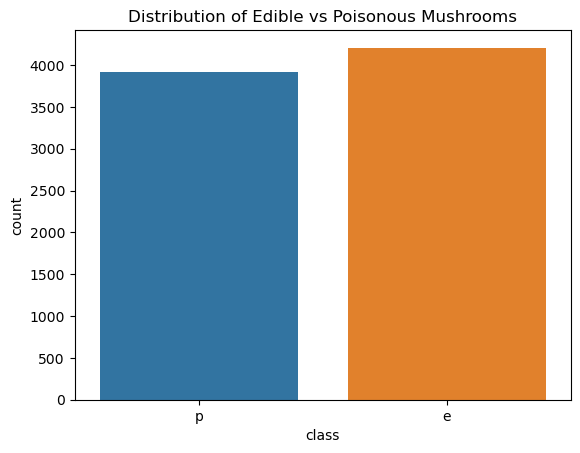

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='class', data=df)
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.show()


Explanation
Seaborn's countplot is used to create a bar chart showing the number of edible and poisonous mushrooms in the dataset.
This distribution helps us understand if we have a balanced dataset. If one class is much larger than the other, 
we might need special handling, as models can be biased towards the majority class.

Step 4: Encode Categorical Variables
Since the data is mostly categorical, we need to encode it into numerical values before feeding it into machine learning models.

Explanation
LabelEncoder assigns a unique numeric value to each category in a feature, allowing us to transform categorical variables into numerical form.
This transformation is necessary because most machine learning algorithms can only work with numerical data

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode each column with LabelEncoder
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

# Verify encoding
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Step 5: Split the Data into Training and Test Sets
Splitting data into training and test sets helps us evaluate how well the model generalizes to unseen data.

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Explanation
train_test_split splits the data into two parts: training data (70%) used for training the model, and testing data (30%) for evaluating the model's performance.

Step 6: Try Different Models
We’ll try out a few classification algorithms and compare their performance. This includes:

Random Forest
Decision Tree
Support Vector Machine (SVM)
K-Nearest Neighbors (KNN)
Naive Bayes

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [9]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train each model and evaluate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 1.00
Decision Tree Accuracy: 1.00
SVM Accuracy: 0.99
KNN Accuracy: 1.00
Naive Bayes Accuracy: 0.93


Step 7: Model Explainability - Feature Importance
For explainability, we’ll use SHAP (SHapley Additive exPlanations) to understand feature importance and contribution. SHAP is widely used to interpret models by showing how features affect individual predictions.

To install and use SHAP, we can run: